In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter, FixedLocator
from matplotlib.font_manager import FontProperties

In [8]:
newmethods = {
    'unitvelo_ind': 'UniTVelo (ind)',
    'velovi': 'veloVI',
    'cell2fate': 'cell2fate',
    'latentvelo_std': 'LatentVelo (std)',
    'pyrovelocity_m1': 'Pyro-velocity (m1)',
    'pyrovelocity_m2': 'Pyro-velocity (m2)',
    'sctour_mse': 'scTour (MSE)',
    'sctour_nb': 'scTour (NB)',
    'sctour_zinb': 'scTour (ZINB)',
    'scvelo_dyn': 'scVelo (dyn)',
    'unitvelo_uni': 'UniTVelo (uni)',
    'deepvelo': 'DeepVelo',
    'svelvetvae': 'SvelvetVAE',
    'tivelo_std': 'TIVelo (std)',
    'tivelo_simple': 'TIVelo (simple)',
    'velocyto': 'Velocyto',
    'veloae': 'VeloAE',
    'velovae_std': 'VeloVAE (std)',
    'velovae_fullvb': 'VeloVAE (Full VB)',
    'kvelo': 'κ-velo',
    'celldancer': 'cellDancer',
    'dynamo_m1': 'Dynamo (m1)',
    'graphvelo_std': 'GraphVelo (std)',
    'scvelo_std': 'scVelo (stc)',
    'sdevelo': 'SDEvelo'
}


old_method_order = [
    'velocyto',
    'scvelo_dyn',
    'scvelo_stc',
    'veloae',
    'dynamo_m1',
    'pyrovelocity_m1',
    'pyrovelocity_m2',
    'unitvelo_uni',
    'unitvelo_ind',
    'velovae_std',
    'velovae_fullvb',
    'kvelo',
    'celldancer',
    'velovi',
    'latentvelo_std',
    'sctour_mse',
    'sctour_nb',
    'sctour_zinb',
    'deepvelo',
    'sdevelo',
    'svelvetvae',
    'cell2fate',
    'tivelo_std',
    'tivelo_simple',
    'graphvelo_std'
]

method_colors = {
    'velocyto': "#6587AB",
    'scvelo_dyn': "#76B7B2",
    'scvelo_stc': "#92CB8A",
    'veloae': "#F6A24F",
    'dynamo_m1': "#FF9DA7",
    'unitvelo_ind': "#9C755F",
    'unitvelo_uni': "#DC6F71",
    'velovae_std': "#C6A11B",
    'velovae_fullvb': "#4F5CD5",
    'deepvelo': "#B07AA1",
    'celldancer': "#2E91E5",
    'pyrovelocity_m1': "#1EB754",
    'pyrovelocity_m2': "#FFBE7A",
    'kvelo': "#A05195",
    'velovi': "#B5BD61",
    'cell2fate': "#AD2513",
    'sdevelo': "#1F3E80",
    'svelvetvae': "#F6D55C",
    'latentvelo_std': "#6ACCBC",
    'tivelo_std': "#694D34",
    'tivelo_simple': "#F39B7F",
    'sctour_mse': "#8A89A6",
    'sctour_nb': "#A7D9D3",
    'sctour_zinb': "#F97F05",
    'graphvelo_std': "#0AC7DC"
}

/tmp/ipykernel_101647/113393015.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_tab20 = list(cm.get_cmap("tab20").colors)
/tmp/ipykernel_101647/113393015.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_set3 = list(cm.get_cmap("Dark2").colors)


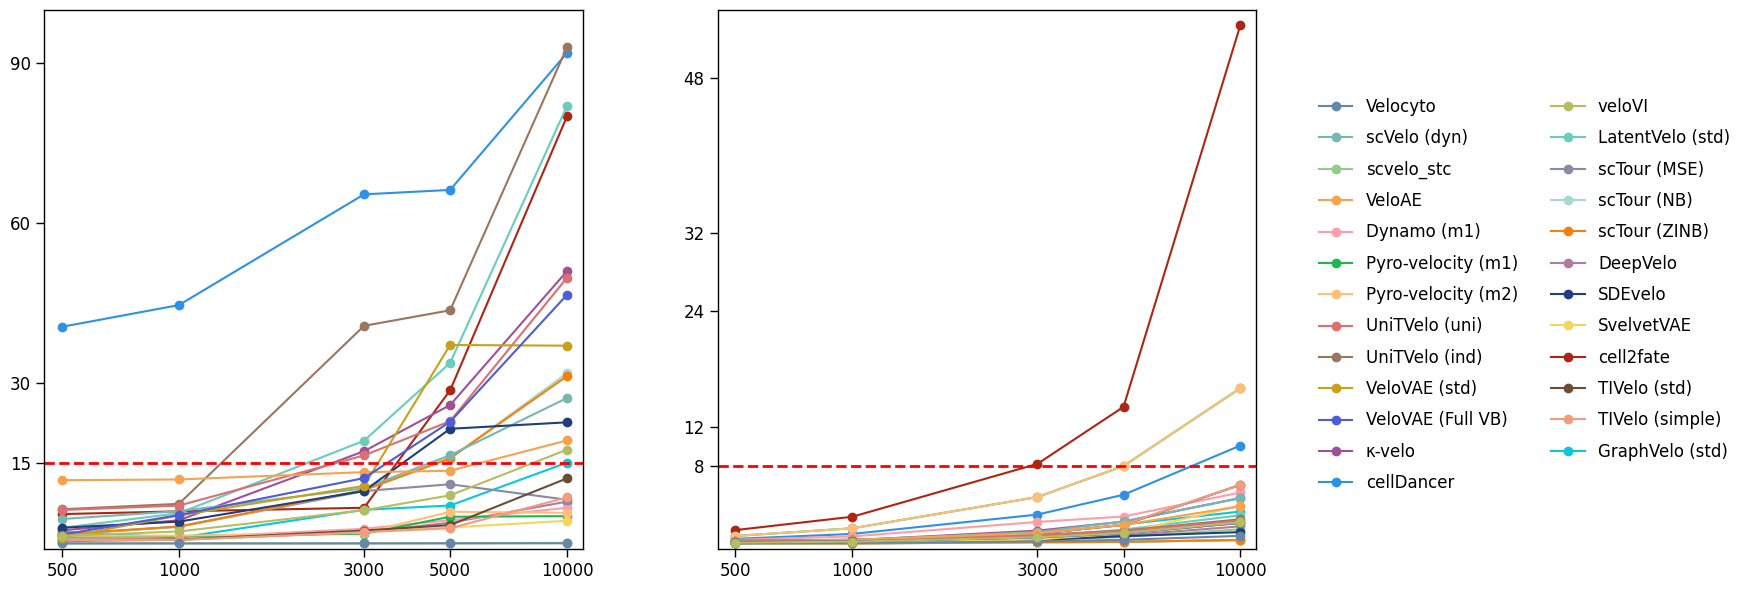

In [9]:
df = pd.read_csv('benchmark_cells_pivot.csv')

cell_nums = np.array([500, 1000, 3000, 5000, 10000])


colors_tab20 = list(cm.get_cmap("tab20").colors)
colors_set3 = list(cm.get_cmap("Dark2").colors)
fallback_colors = colors_tab20 + colors_set3

unique_methods = []
for m in df['method'].tolist():
    if m not in unique_methods:
        unique_methods.append(m)


auto_color_map = {}
fallback_iter = iter(fallback_colors)
for m in unique_methods:
    if m in method_colors:
        auto_color_map[m] = method_colors[m]
    else:
        try:
            auto_color_map[m] = next(fallback_iter)
        except StopIteration:

            fallback_iter = iter(fallback_colors)
            auto_color_map[m] = next(fallback_iter)


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax_time, ax_mem = axes

def set_axes_style(ax):
    for spine in ax.spines.values():
        spine.set_linewidth(1)
    ax.tick_params(axis='both', which='major', direction='out', length=6, width=1, labelsize=12,bottom=True, left=True, top=False, right=False)
    ax.tick_params(axis='both', which='minor', direction='out', length=4, width=1,bottom=True, left=True, top=False, right=False)
    ax.set_xlabel('', fontsize=14)
    ax.set_ylabel('', fontsize=14)
    ax.set_title('')

for _, row in df.iterrows():
    old_name = row['method']
    new_name = newmethods.get(old_name, old_name)
    times_min = row[['time_500', 'time_1000', 'time_3000', 'time_5000', 'time_10000']].values / 60.0

    color = auto_color_map.get(old_name, 'gray')
    ax_time.plot(cell_nums, times_min, marker='o', label=new_name, color=color)

ax_time.set_xscale('log')
ax_time.xaxis.set_major_locator(FixedLocator(cell_nums))
ax_time.set_xticklabels(cell_nums)
ax_time.set_xlim(cell_nums[0] * 0.9, cell_nums[-1] * 1.1)
ax_time.xaxis.set_minor_locator(plt.NullLocator())

formatter = ScalarFormatter()
formatter.set_scientific(False)
ax_time.xaxis.set_major_formatter(formatter)

ax_time.set_yticks([15, 30, 60, 90])
ax_time.set_ylim(-1, 100)
ax_time.axhline(y=15, color='red', linestyle='--', linewidth=2)

set_axes_style(ax_time)

for _, row in df.iterrows():
    old_name = row['method']
    new_name = newmethods.get(old_name, old_name)
    mem_gb = row[['mem_500', 'mem_1000', 'mem_3000', 'mem_5000', 'mem_10000']].values / 1024.0

    color = auto_color_map.get(old_name, 'gray')
    ax_mem.plot(cell_nums, mem_gb, marker='o', label=new_name, color=color)

ax_mem.set_xscale('log')
ax_mem.xaxis.set_major_locator(FixedLocator(cell_nums))
ax_mem.set_xticklabels(cell_nums)
ax_mem.set_xlim(cell_nums[0] * 0.9, cell_nums[-1] * 1.1)
ax_mem.xaxis.set_minor_locator(plt.NullLocator())
ax_mem.xaxis.set_major_formatter(formatter)

ax_mem.set_yticks([8, 12, 24, 32, 48])
ax_mem.set_ylim(-0.5, 55)
ax_mem.axhline(y=8, color='red', linestyle='--', linewidth=2)

set_axes_style(ax_mem)

legend_font = FontProperties(size=12)

handles, labels = ax_time.get_legend_handles_labels()

ordered_handles = []
ordered_labels = []

for old in old_method_order:
    new = newmethods.get(old, old)
    if new in labels:
        idx = labels.index(new)
        ordered_handles.append(handles[idx])
        ordered_labels.append(labels[idx])
    else:
        continue

if not ordered_handles:
    ordered_handles, ordered_labels = handles, labels

fig.legend(
    ordered_handles, ordered_labels,
    ncol=2, loc='center right', bbox_to_anchor=(1.25, 0.5),
    prop=legend_font, frameon=False,labelspacing=0.8
)

plt.tight_layout(rect=[0, 0, 0.92, 1])
fig.subplots_adjust(wspace=0.25)

plt.savefig("time_memory_cells.svg", format='svg', dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipykernel_101647/3724627430.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_tab20 = list(cm.get_cmap("tab20").colors)
/tmp/ipykernel_101647/3724627430.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_set3 = list(cm.get_cmap("Dark2").colors)


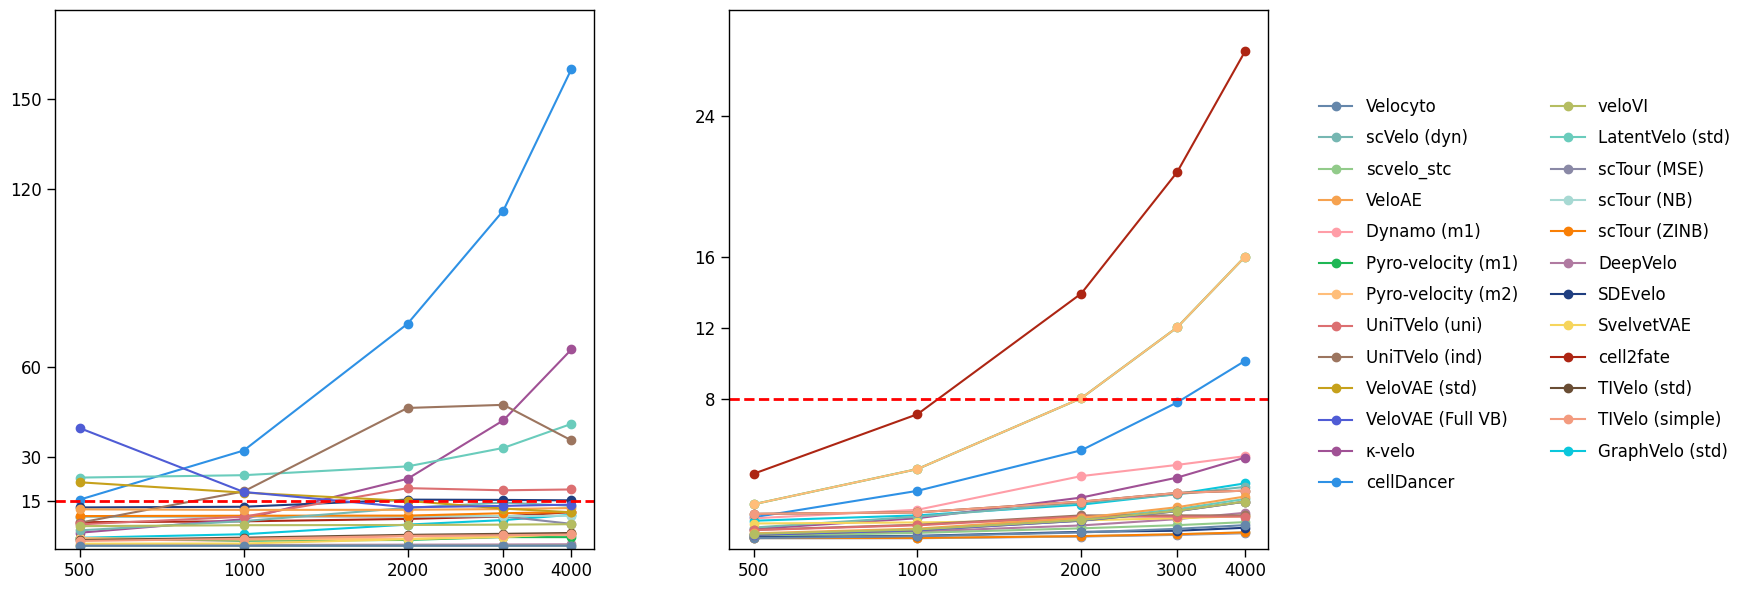

In [10]:
df = pd.read_csv('benchmark_genes_pivot.csv')

gene_nums = np.array([500, 1000, 2000, 3000, 4000])

colors_tab20 = list(cm.get_cmap("tab20").colors)
colors_set3 = list(cm.get_cmap("Dark2").colors)
fallback_colors = colors_tab20 + colors_set3

unique_methods = []
for m in df['method'].tolist():
    if m not in unique_methods:
        unique_methods.append(m)

auto_color_map = {}
fallback_iter = iter(fallback_colors)

for m in unique_methods:
    if m in method_colors:
        auto_color_map[m] = method_colors[m]
    else:
        try:
            auto_color_map[m] = next(fallback_iter)
        except StopIteration:
            fallback_iter = iter(fallback_colors)
            auto_color_map[m] = next(fallback_iter)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax_time, ax_mem = axes

def set_axes_style(ax):
    for spine in ax.spines.values():
        spine.set_linewidth(1)
    ax.tick_params(axis='both', which='major', direction='out', length=6, width=1, labelsize=12,bottom=True, left=True, top=False, right=False)
    ax.tick_params(axis='both', which='minor', direction='out', length=4, width=1,bottom=True, left=True, top=False, right=False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')

for _, row in df.iterrows():
    old = row['method']
    new = newmethods.get(old, old)
    times_min = row[['time_500', 'time_1000', 'time_2000', 'time_3000', 'time_4000']].values / 60.0
    color = auto_color_map[old]

    ax_time.plot(gene_nums, times_min, marker='o', label=new, color=color)

ax_time.set_xscale('log')
ax_time.xaxis.set_major_locator(FixedLocator(gene_nums))
ax_time.set_xticklabels(gene_nums)
ax_time.set_xlim(gene_nums[0] * 0.9, gene_nums[-1] * 1.1)
ax_time.xaxis.set_minor_locator(plt.NullLocator())

formatter = ScalarFormatter()
formatter.set_scientific(False)
ax_time.xaxis.set_major_formatter(formatter)

ax_time.set_yticks([15, 30, 60, 120, 150])
ax_time.set_ylim(-1, 180)
ax_time.axhline(y=15, color='red', linestyle='--', linewidth=2)

set_axes_style(ax_time)

for _, row in df.iterrows():
    old = row['method']
    new = newmethods.get(old, old)
    mem_gb = row[['mem_500', 'mem_1000', 'mem_2000', 'mem_3000', 'mem_4000']].values / 1024.0
    color = auto_color_map[old]

    ax_mem.plot(gene_nums, mem_gb, marker='o', label=new, color=color)

ax_mem.set_xscale('log')
ax_mem.xaxis.set_major_locator(FixedLocator(gene_nums))
ax_mem.set_xticklabels(gene_nums)
ax_mem.set_xlim(gene_nums[0] * 0.9, gene_nums[-1] * 1.1)
ax_mem.xaxis.set_minor_locator(plt.NullLocator())
ax_mem.xaxis.set_major_formatter(formatter)

ax_mem.set_yticks([8, 12, 16, 24])
ax_mem.set_ylim(-0.5, 30)
ax_mem.axhline(y=8, color='red', linestyle='--', linewidth=2)

set_axes_style(ax_mem)

handles, labels = ax_time.get_legend_handles_labels()

ordered_handles = []
ordered_labels = []

for old in old_method_order:
    new = newmethods.get(old, old)
    if new in labels:
        idx = labels.index(new)
        ordered_handles.append(handles[idx])
        ordered_labels.append(labels[idx])

if not ordered_handles:
    ordered_handles, ordered_labels = handles, labels

legend_font = FontProperties(size=12)

fig.legend(
    ordered_handles, ordered_labels,
    ncol=2,
    loc='center right',
    bbox_to_anchor=(1.25, 0.5),
    prop=legend_font,
    frameon=False,
    labelspacing=0.8
)

plt.tight_layout(rect=[0, 0, 0.92, 1])
fig.subplots_adjust(wspace=0.25)
plt.savefig("time_memory_genes.svg",
            format='svg', dpi=300, bbox_inches="tight")
plt.show()
